In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
sns.set()

In [5]:
train_data = pd.read_csv('train_ctrUa4K.csv')

In [6]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
train_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [8]:
train_data['Gender'] = train_data['Gender'].fillna(train_data['Gender'].mode()[0])
train_data['Married']=train_data['Married'].fillna(train_data['Married'].mode()[0])
train_data['Self_Employed'] = train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0])

In [9]:
train_data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,15
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,0


**I replaced the missing values of most of the columns using mode() but i left few because taking mode in such cases might make my model a bit skewed or will give wrong predictions, so instead or replacing values we will predict the missing values.**





In [10]:
#for Dependents

train_data_dependents = train_data[train_data['Dependents'].notna()]
X_dependents = train_data_dependents.drop(['Dependents','Loan_ID'],axis=1)
y_dependents=train_data_dependents['Dependents']

le = LabelEncoder()

for column in X_dependents.columns:
  if X_dependents[column].dtype == object:
    X_dependents[column] = le.fit_transform(X_dependents[column])


rf_dependents = RandomForestClassifier(n_estimators=100,random_state=42)
rf_dependents.fit(X_dependents,y_dependents)

#Predicting the missing values
X_missing_dependents = train_data[train_data['Dependents'].isna()].drop(columns = ['Dependents','Loan_ID'])

for column in X_missing_dependents.columns:
  if X_missing_dependents[column].dtype == object:
    X_missing_dependents[column] = le.fit_transform(X_missing_dependents[column])

predicted_dependents = rf_dependents.predict(X_missing_dependents)

train_data.loc[train_data['Dependents'].isna(),'Dependents'] = predicted_dependents

In [11]:
#for LoanAmount

train_data_loanamount = train_data[train_data['LoanAmount'].notna()]
X_loanamount = train_data_loanamount.drop(columns=['Loan_ID','LoanAmount'])
y_loanamount = train_data_loanamount['LoanAmount']

l = LabelEncoder()

for column in X_loanamount.columns:
  if X_loanamount[column].dtype == object:
    X_loanamount[column] = l.fit_transform(X_loanamount[column])

    rf_loanamount = RandomForestRegressor(n_estimators =100,random_state=42)
rf_loanamount.fit(X_loanamount,y_loanamount)

#Prediciting the missing values
X_missing_loanamount = train_data[train_data['LoanAmount'].isna()].drop(columns=['Loan_ID','LoanAmount'])

for column in X_missing_loanamount.columns:
  if X_missing_loanamount[column].dtype == object:
    X_missing_loanamount[column] = l.fit_transform(X_missing_loanamount[column])

predicted_loanamount = rf_loanamount.predict(X_missing_loanamount)

train_data.loc[train_data['LoanAmount'].isna(),'LoanAmount'] = predicted_loanamount

In [12]:
#for Credit HIstory

train_data_credithistory = train_data[train_data['Credit_History'].notna()]
X_credithistory = train_data_credithistory.drop(columns = ['Loan_ID','Credit_History'])
y_credithistory = train_data_credithistory['Credit_History']

l1 = LabelEncoder()

for column in X_credithistory.columns:
  if X_credithistory[column].dtype == object:
    X_credithistory[column] = l1.fit_transform(X_credithistory[column])

rf_credithistory = RandomForestClassifier()
rf_credithistory.fit(X_credithistory,y_credithistory)

#predicting the missing values

X_missing_credithistory = train_data[train_data['Credit_History'].isna()].drop(columns = ['Loan_ID','Credit_History'])

for column in X_missing_credithistory.columns:
  if X_missing_credithistory[column].dtype == object:
    X_missing_credithistory[column] = l1.fit_transform(X_missing_credithistory[column])

predicted_credithistory = rf_credithistory.predict(X_missing_credithistory)
train_data.loc[train_data['Credit_History'].isna(),'Credit_History'] = predicted_credithistory

In [13]:
train_data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [14]:
#Predicting whether the loan should be given or not
a = train_data.drop(columns= ['Loan_ID','Loan_Status'])
b = train_data['Loan_Status']

a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.25,random_state=42)

l2 = LabelEncoder()
for column in a_train.columns:
  if a_train[column].dtype == object:
    a_train[column] = l2.fit_transform(a_train[column])

rf = RandomForestClassifier(n_estimators=89,random_state=42)
rf.fit(a_train,b_train)


RandomForestClassifier(n_estimators=89, random_state=42)

In [15]:
#Model Evaluation

for column in a_test.columns:
  if a_test[column].dtype == object:
    a_test[column]=l2.fit_transform(a_test[column])

b_predict = rf.predict(a_test)
print("Accuracy Score:",accuracy_score(b_test,b_predict))
print('Confusion Matrix: ',confusion_matrix(b_test,b_predict))
print(
  classification_report(b_test,b_predict))

Accuracy Score: 0.7987012987012987
Confusion Matrix:  [[26 28]
 [ 3 97]]
              precision    recall  f1-score   support

           N       0.90      0.48      0.63        54
           Y       0.78      0.97      0.86       100

    accuracy                           0.80       154
   macro avg       0.84      0.73      0.74       154
weighted avg       0.82      0.80      0.78       154



Text(0, 0.5, 'Count')

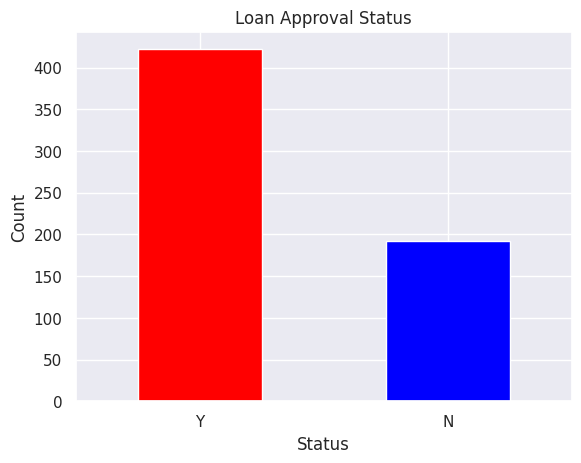

In [16]:
train_data['Loan_Status'].value_counts().plot(kind='bar',color=['red','blue'],rot=0)
plt.title('Loan Approval Status')
plt.xlabel('Status')
plt.ylabel('Count')

Text(46.25, 0.5, 'Actual')

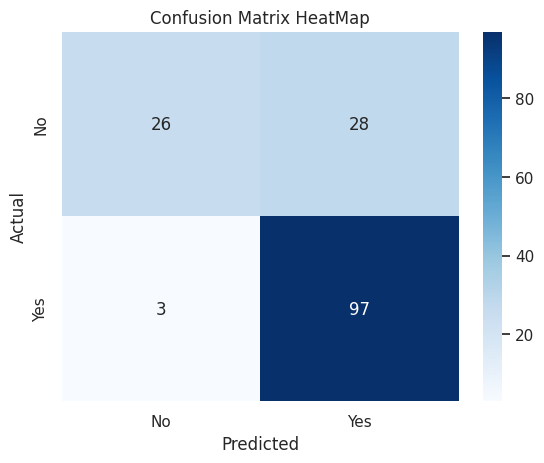

In [17]:
sns.heatmap(confusion_matrix(b_test,b_predict),annot=True,cmap='Blues',xticklabels=['No','Yes'],yticklabels=('No','Yes'))
plt.title('Confusion Matrix HeatMap')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(0.5, 1.0, 'Feature Importance bar chart')

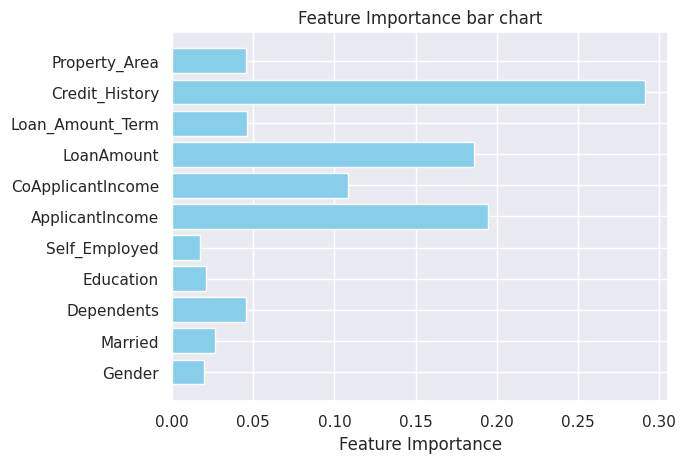

In [18]:
feature_names = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']

plt.barh(feature_names,rf.feature_importances_,color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance bar chart')

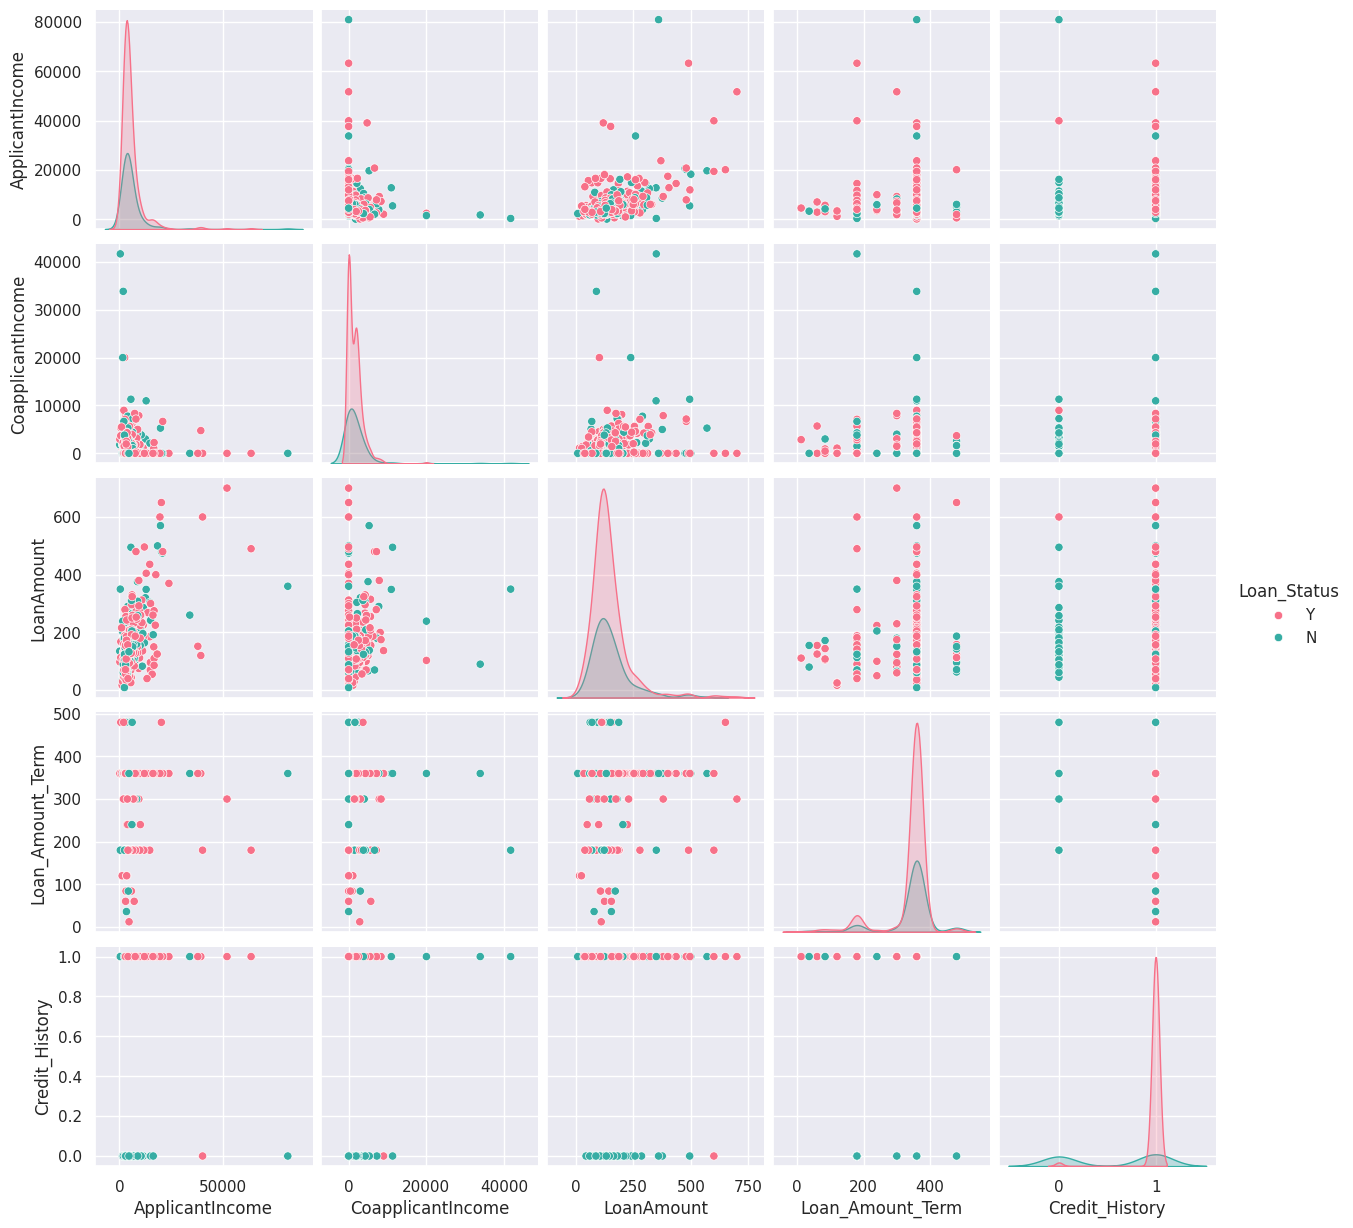

In [19]:
sns.pairplot(train_data,hue='Loan_Status',palette='husl')
plt.show()